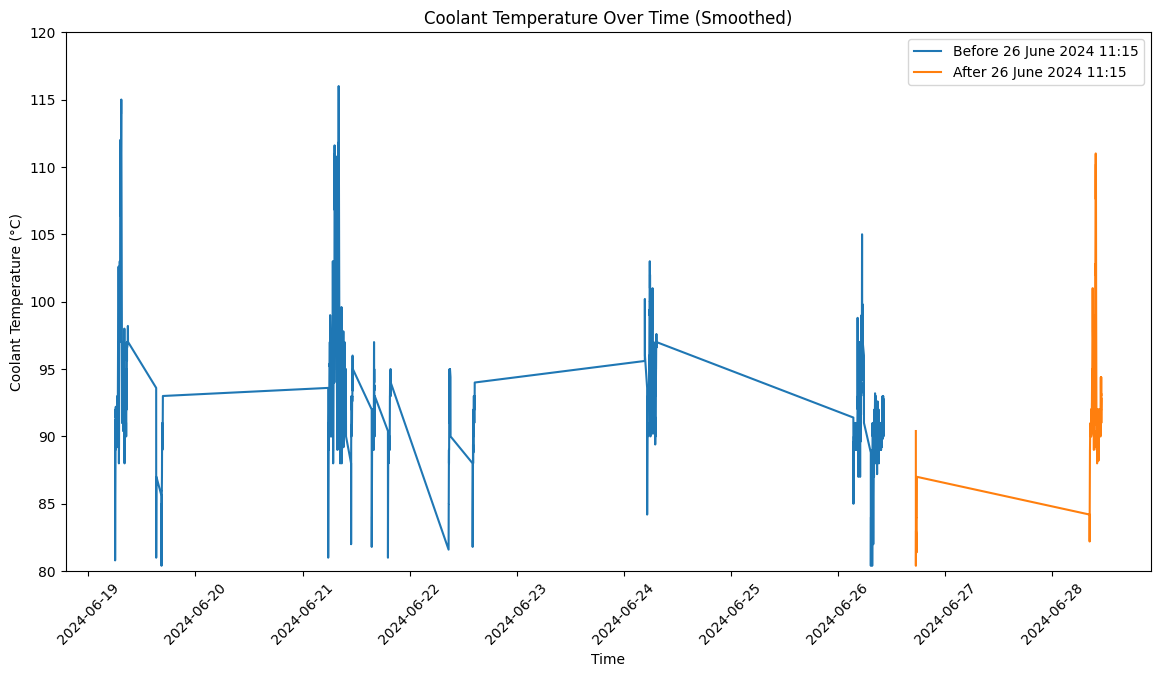

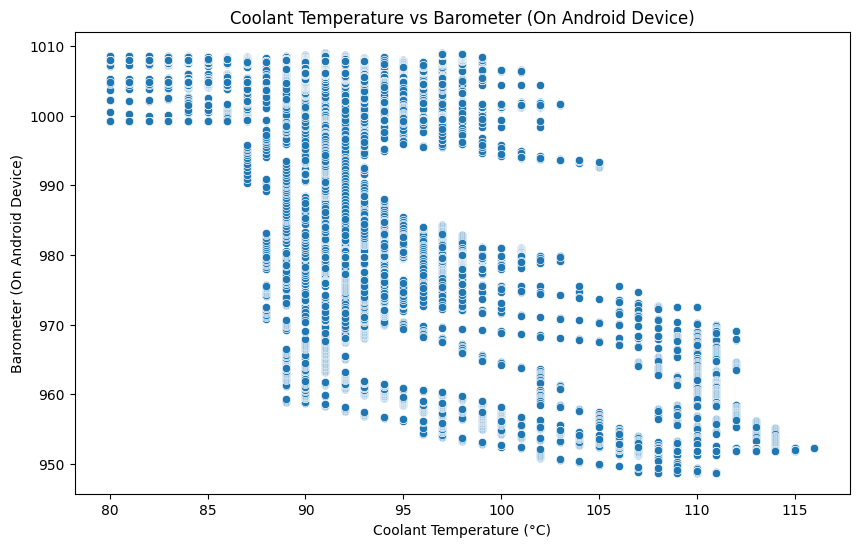

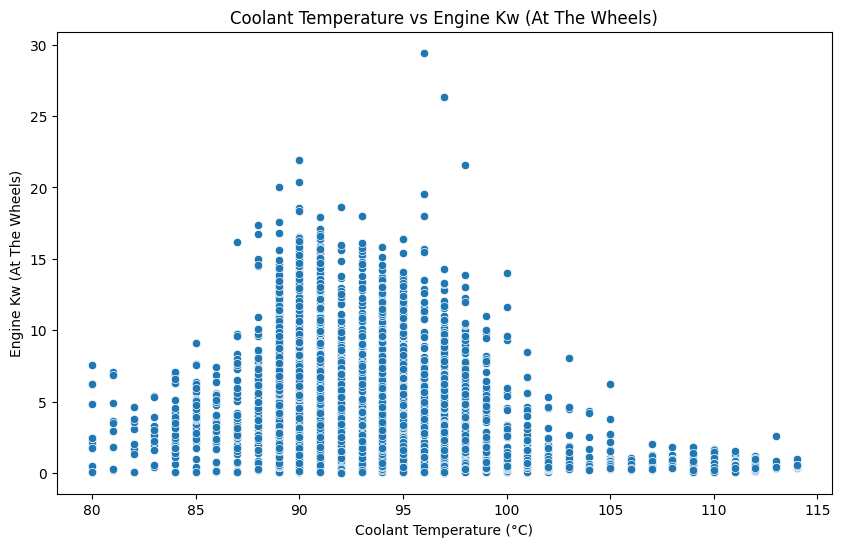

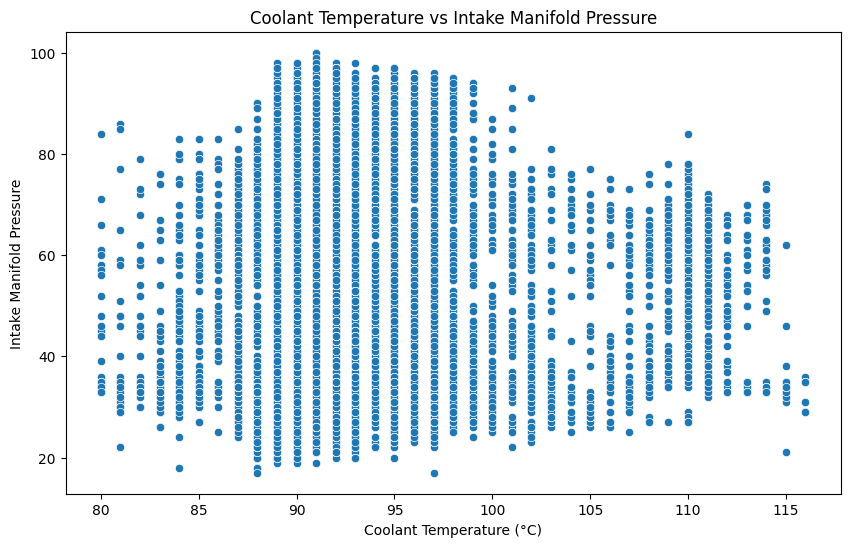

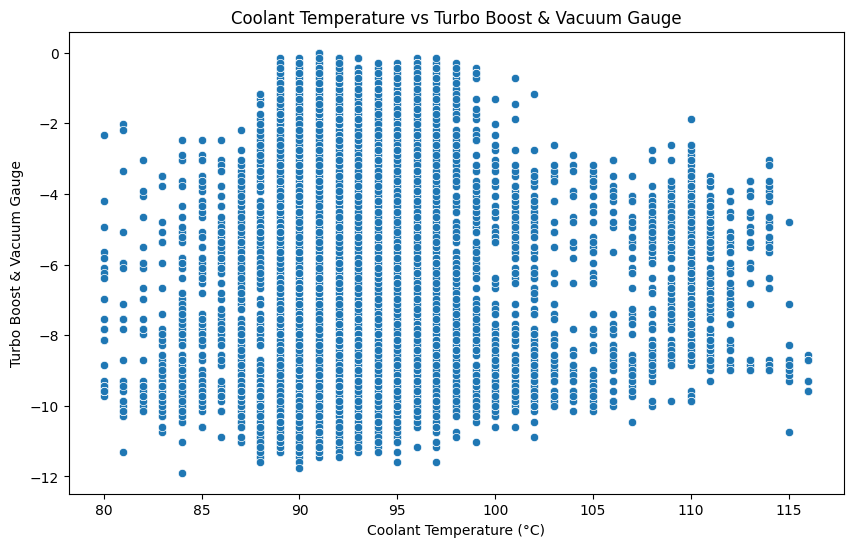

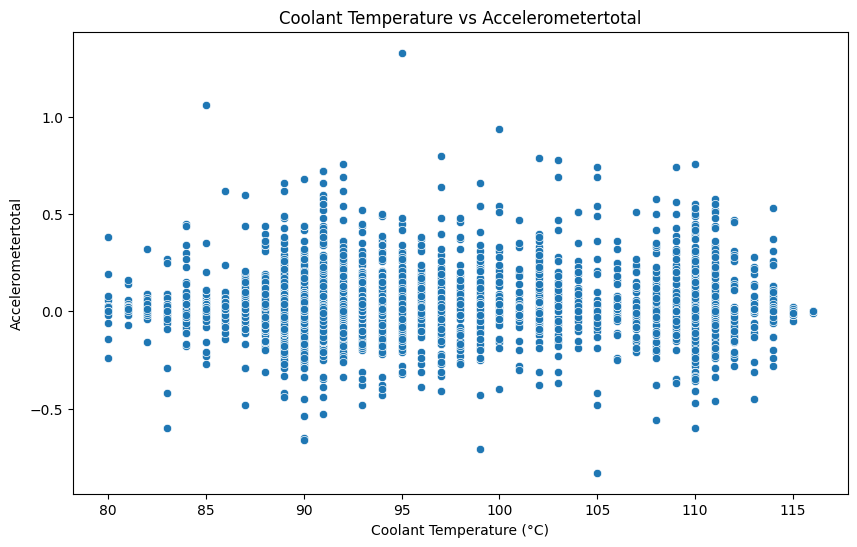

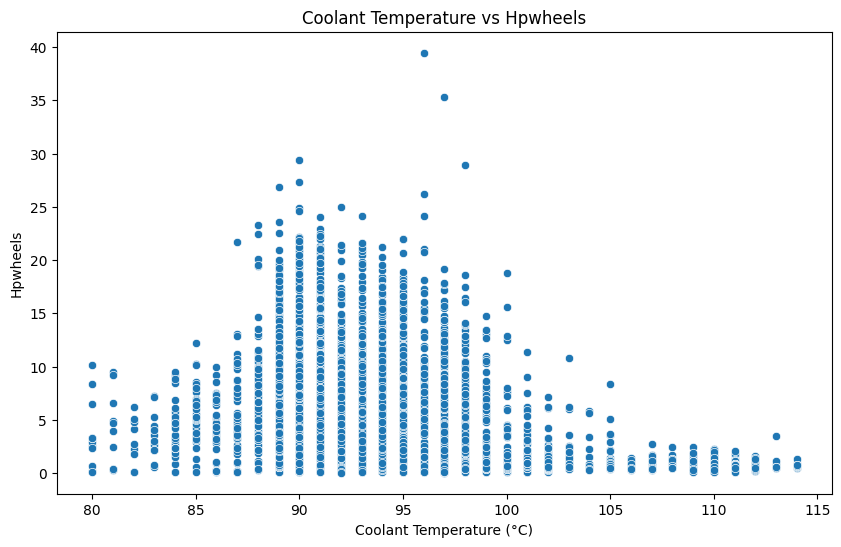

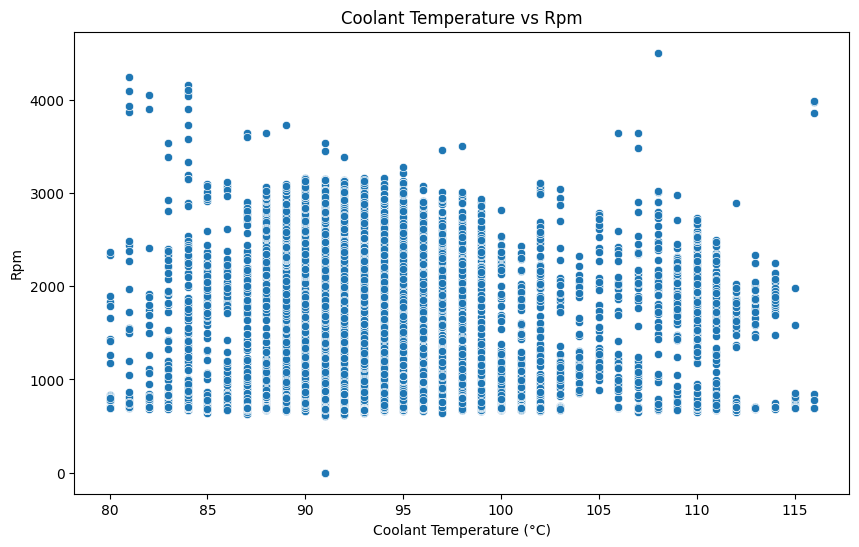

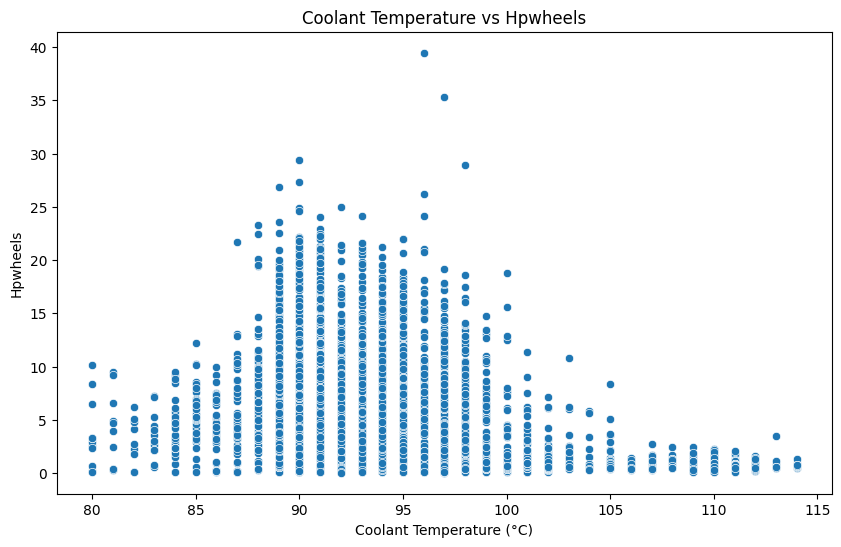

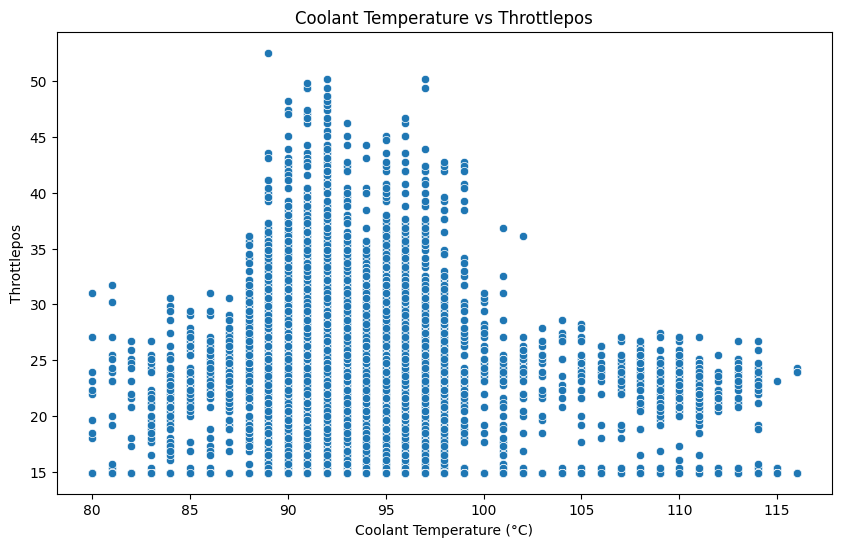

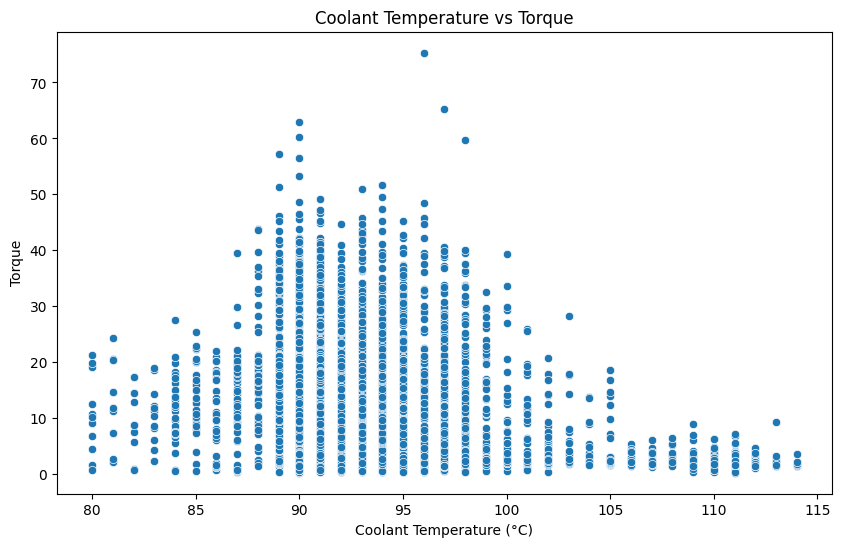

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
import pytz
from scipy.stats import ttest_ind

# Load the data
data = pd.read_csv('./influxdata_no_gps_2024-06-28.csv')

# Convert the time column to datetime with UTC timezone
data['time'] = pd.to_datetime(data['time']).dt.tz_convert('UTC')

# Filter data to include only temperatures in the 80-120 range
data = data[(data['coolanttemp'] >= 80) & (data['coolanttemp'] <= 120)]

# Define the cutoff datetime with UTC timezone
cutoff = datetime(2024, 6, 26, 11, 15, tzinfo=pytz.UTC)

# Split the data into before and after the cutoff
before_cutoff = data[data['time'] < cutoff].copy()
after_cutoff = data[data['time'] >= cutoff].copy()

# Apply rolling mean to smooth out the curves, using a window of 5 (you can adjust this)
before_cutoff.loc[:, 'smooth_coolanttemp'] = before_cutoff['coolanttemp'].rolling(window=5).mean()
after_cutoff.loc[:, 'smooth_coolanttemp'] = after_cutoff['coolanttemp'].rolling(window=5).mean()

# Plotting the data
plt.figure(figsize=(14, 7))

# Plot before cutoff
sns.lineplot(x='time', y='smooth_coolanttemp', data=before_cutoff, label='Before 26 June 2024 11:15')

# Plot after cutoff
sns.lineplot(x='time', y='smooth_coolanttemp', data=after_cutoff, label='After 26 June 2024 11:15')

plt.title('Coolant Temperature Over Time (Smoothed)')
plt.xlabel('Time')
plt.ylabel('Coolant Temperature (°C)')
plt.legend()
plt.xticks(rotation=45)
plt.ylim(80, 120)
plt.show()

# Extract coolant temperatures
coolant_before = before_cutoff['coolanttemp'].dropna()
coolant_after = after_cutoff['coolanttemp'].dropna()

# List of other sensors to plot against coolant temperature
other_sensors = [
    'Barometer (on Android device)', 'Engine kW (At the wheels)', 'Intake Manifold Pressure','Turbo Boost & Vacuum Gauge',
    'accelerometertotal', 'hpwheels', 'rpm', 'hpwheels', 'throttlepos', 
    'torque'
]

# Plot scatter plots for each sensor against coolant temperature
for sensor in other_sensors:
    if sensor in data.columns:
        plt.figure(figsize=(10, 6))
        sns.scatterplot(x='coolanttemp', y=sensor, data=data)
        plt.title(f'Coolant Temperature vs {sensor.replace("_", " ").title()}')
        plt.xlabel('Coolant Temperature (°C)')
        plt.ylabel(sensor.replace("_", " ").title())
        plt.show()